In [83]:
import ROOT
from ROOT import gStyle, gPad
import uuid

gStyle.SetOptStat(0)

path = './DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'

root_file = ROOT.TFile(path)

eff_dir = root_file.Get('DQMData/Run 1/GEM/Run summary/Efficiency/type1/Efficiency')
misc_dir = root_file.Get('DQMData/Run 1/GEM/Run summary/Efficiency/type1/Misc')

eff_dir.ls()

In [60]:
class Canvas:
    def __init__(self, height=500, width=500, nx=1, ny=1):
        self.canvas = ROOT.TCanvas(f'c-{uuid.uuid4()}', '', width, height)
        if nx > 1 or ny > 1:
            self.canvas.Divide(nx, ny)

    def __enter__(self):
        return self.canvas

    def __exit__(self, type, value, trace_back):
        self.canvas.Draw()

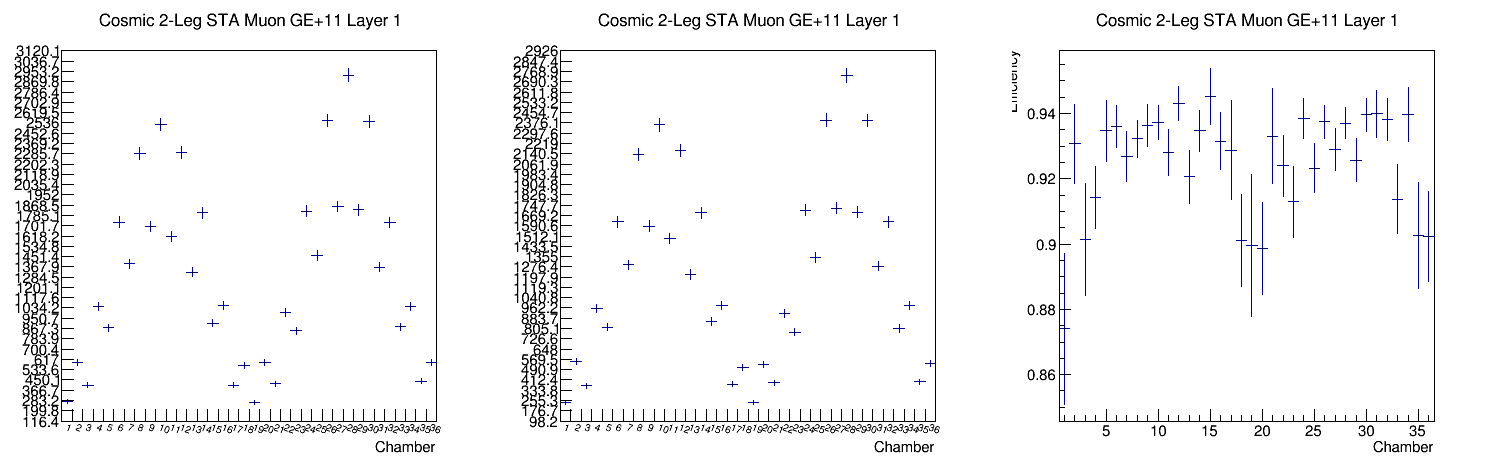

In [61]:
# key = 'chamber_GE11-P-L1'
key = 'chamber_GE+11_L1'
with Canvas(width=1500, nx=3) as c:
    c.cd(1)
    h = eff_dir.Get(key)
    #h.GetYaxis().SetRangeUser(0)
    h.Draw()
    
    c.cd(2)
    h = eff_dir.Get(key + '_matched')
    h.Draw()
    
    c.cd(3)
    h = eff_dir.Get('eff_' + key)
    h.Draw()

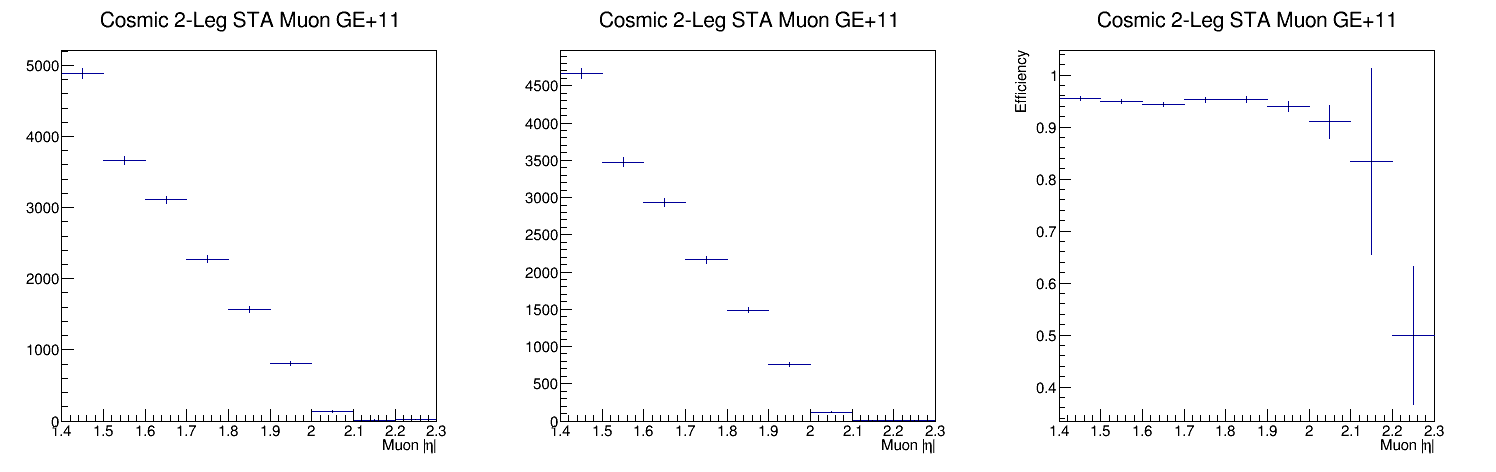

In [64]:
# key = 'muon_eta_GE11-P'
key = 'muon_eta_GE+11'
with Canvas(width=1500, nx=3) as c:
    c.cd(1)
    h = eff_dir.Get(key)
    h.Draw()
    
    c.cd(2)
    h = eff_dir.Get(key + '_matched')
    h.Draw()
    
    c.cd(3)
    h = eff_dir.Get('eff_' + key)
    h.Draw()

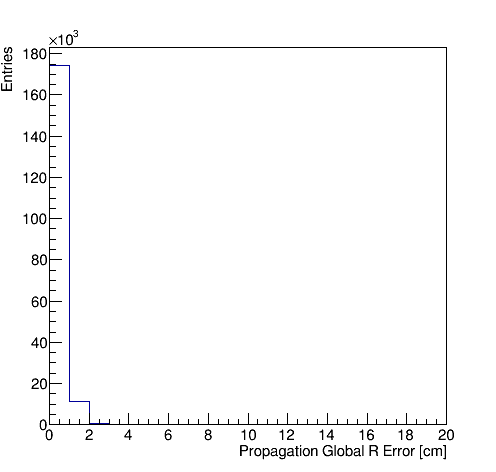

In [65]:
with Canvas() as c:
    h = misc_dir.Get('prop_r_err')
    h.Draw()

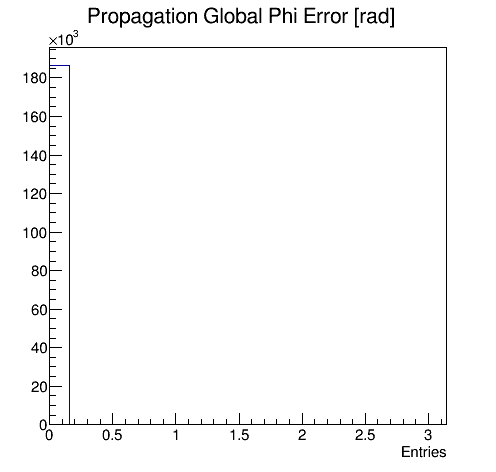

In [66]:
with Canvas() as c:
    h = misc_dir.Get('prop_phi_err')
    h.Draw()

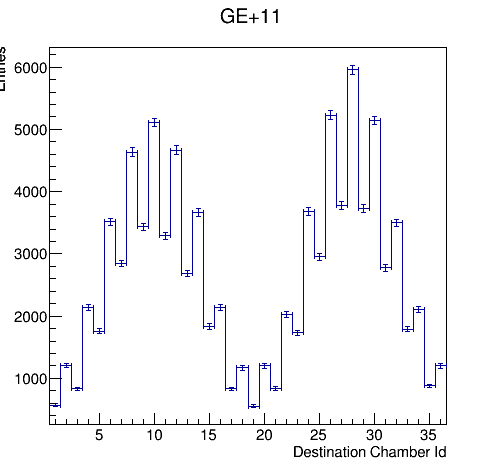

In [76]:
with Canvas() as c:
    h = misc_dir.Get('prop_chamber_GE+11')
    h.Draw('HIST E1')

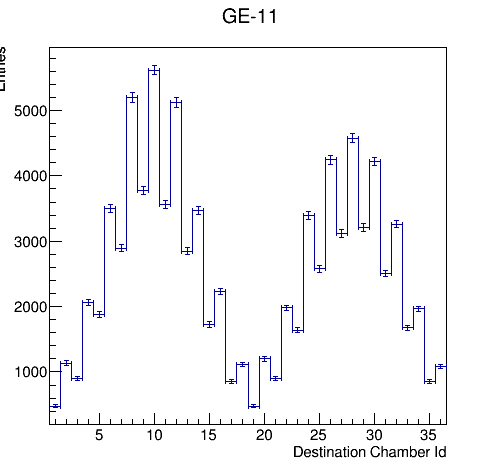

In [77]:
with Canvas() as c:
    h = misc_dir.Get('prop_chamber_GE-11')
    h.Draw('HIST E1')